# Machine learning project for Titanic

This project is practing on using Python Pandas, Numpy, Sklearn to do analysis on the survival rate of passenger in Titanic.

In [141]:
%xmode Plain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 20

# machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Exception reporting mode: Plain


In [4]:
# get the current working directory
cwd = os.getcwd()

# print the current working directory
print(f"Current working directory: {cwd}")


Current working directory: c:\Users\johnn\Documents\Research\codebook\titanic


In [9]:
# read datasets
train_datasets = pd.read_csv('train.csv')
test_datasets = pd.read_csv('test.csv')
submission_datasets = pd.read_csv('gender_submission.csv')

In [17]:
train_datasets.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Basic description on training datasets
train_datasets.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

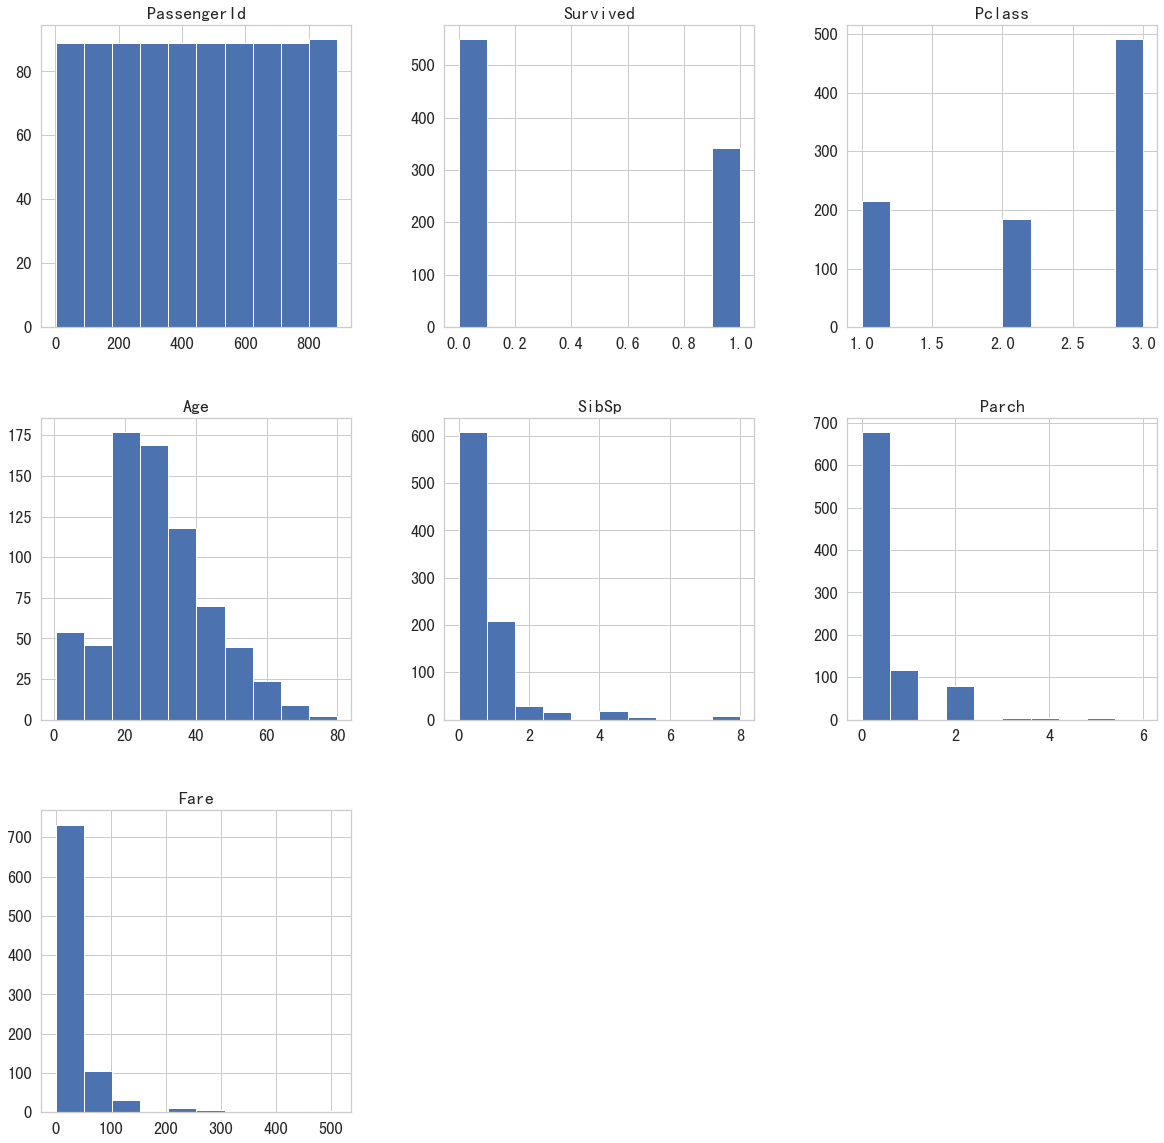

In [62]:
train_datasets.hist(figsize=(20, 20))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

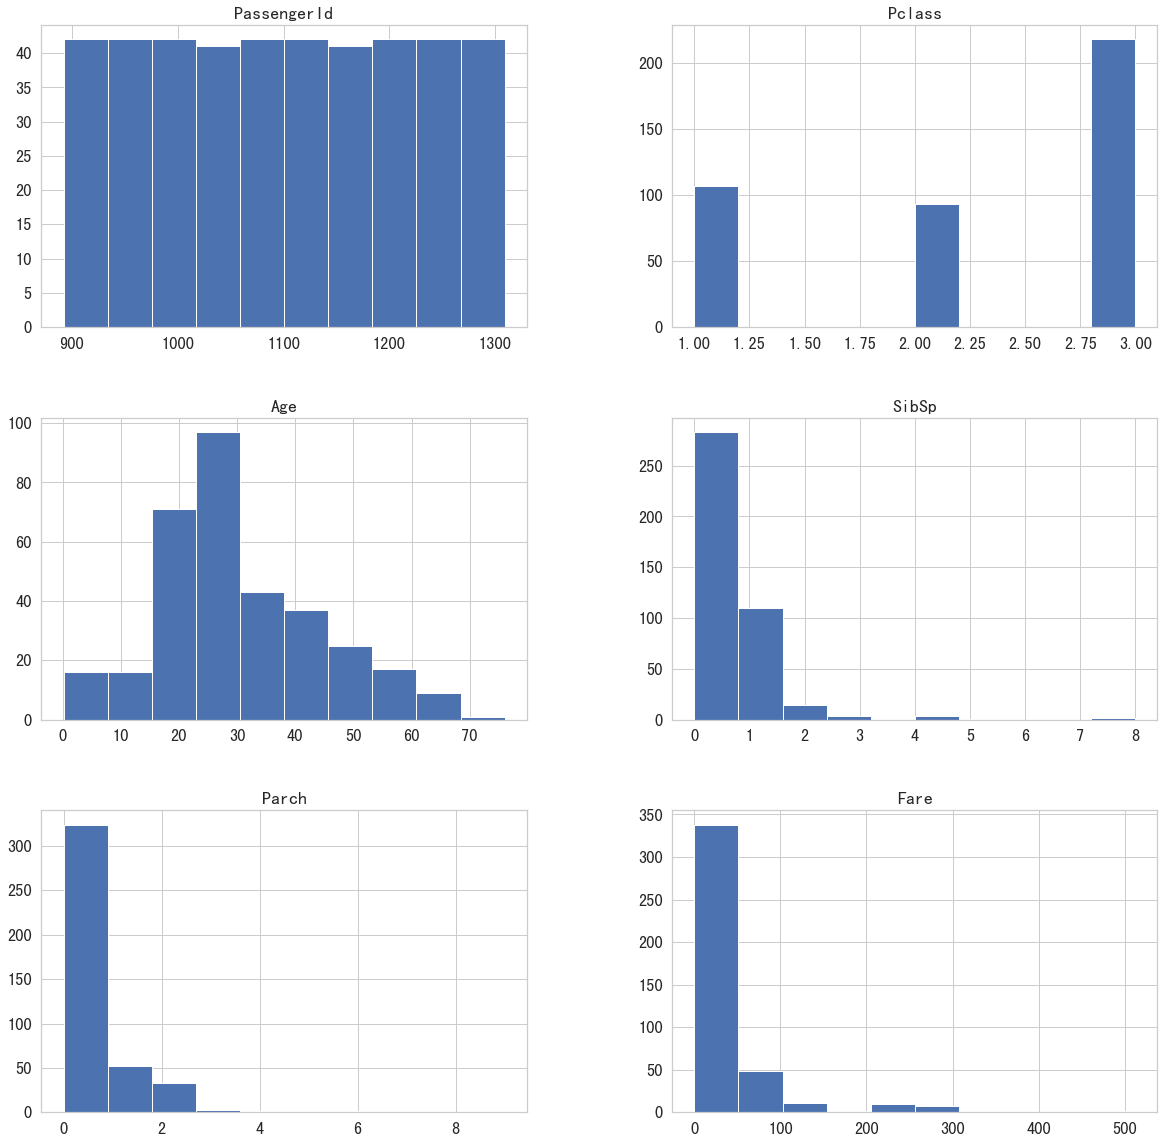

In [16]:
test_datasets.hist(figsize=(20, 20))

In [63]:
train_datasets[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [48]:
train_datasets[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [49]:
train_datasets[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [51]:
train_datasets[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


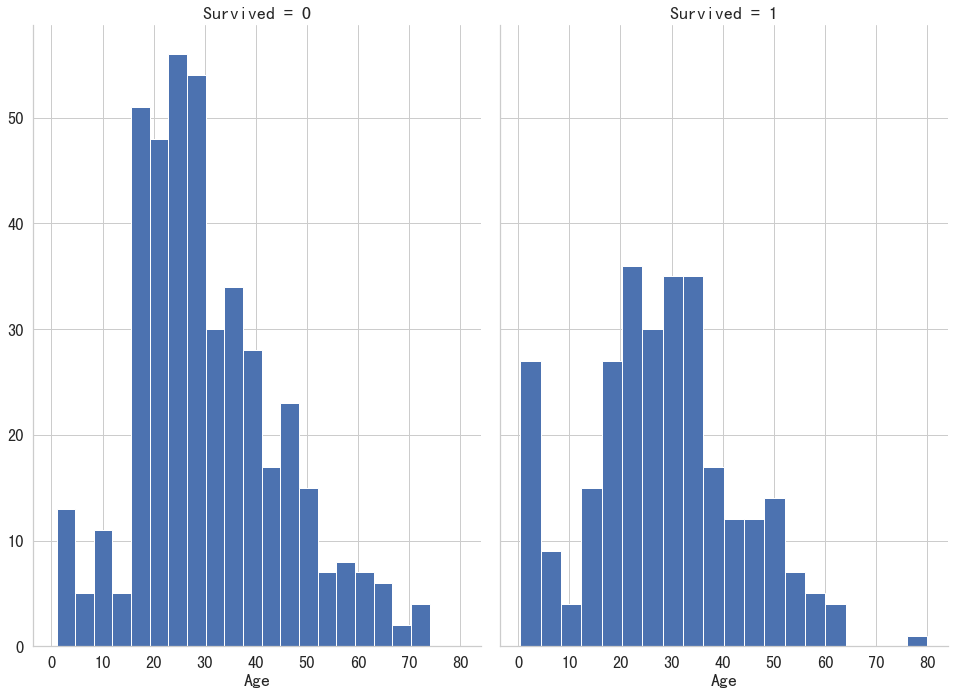

In [74]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid', {'font.sans-serif':['simhei','Arial']})
g = sns.FacetGrid(train_datasets, col='Survived', height=10,aspect=.68)
g.map(plt.hist, 'Age', bins=20)

C:\Users\johnn\Anaconda3\envs\pymc_env\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\johnn\Anaconda3\envs\pymc_env\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


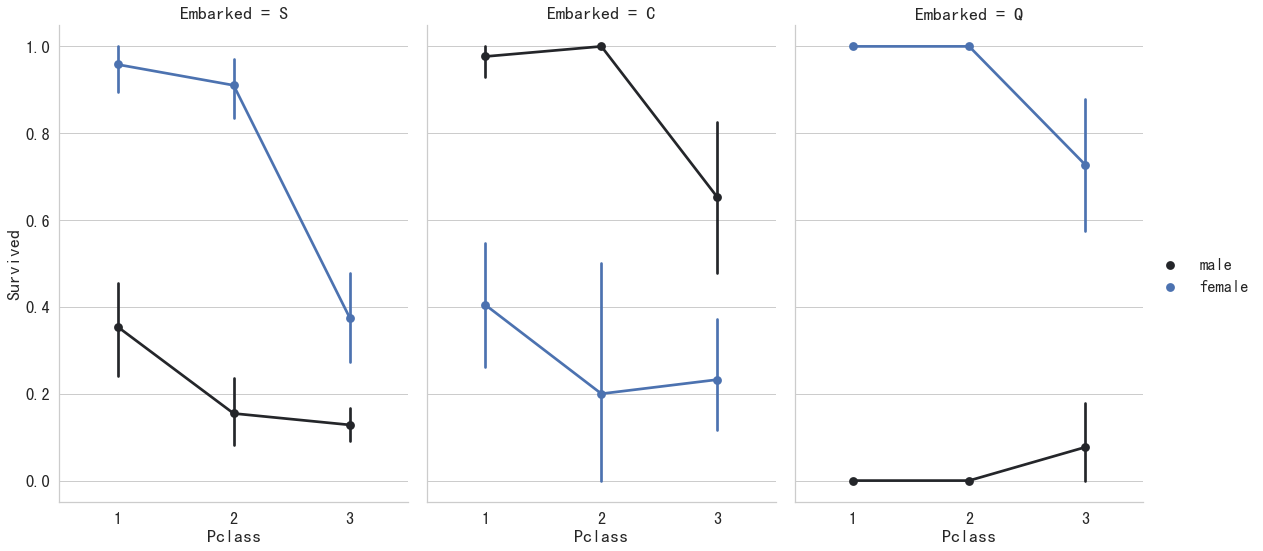

In [75]:
grid = sns.FacetGrid(train_datasets, col='Embarked', height=8, aspect=0.68)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', plaette='deep')
grid.add_legend()

C:\Users\johnn\Anaconda3\envs\pymc_env\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


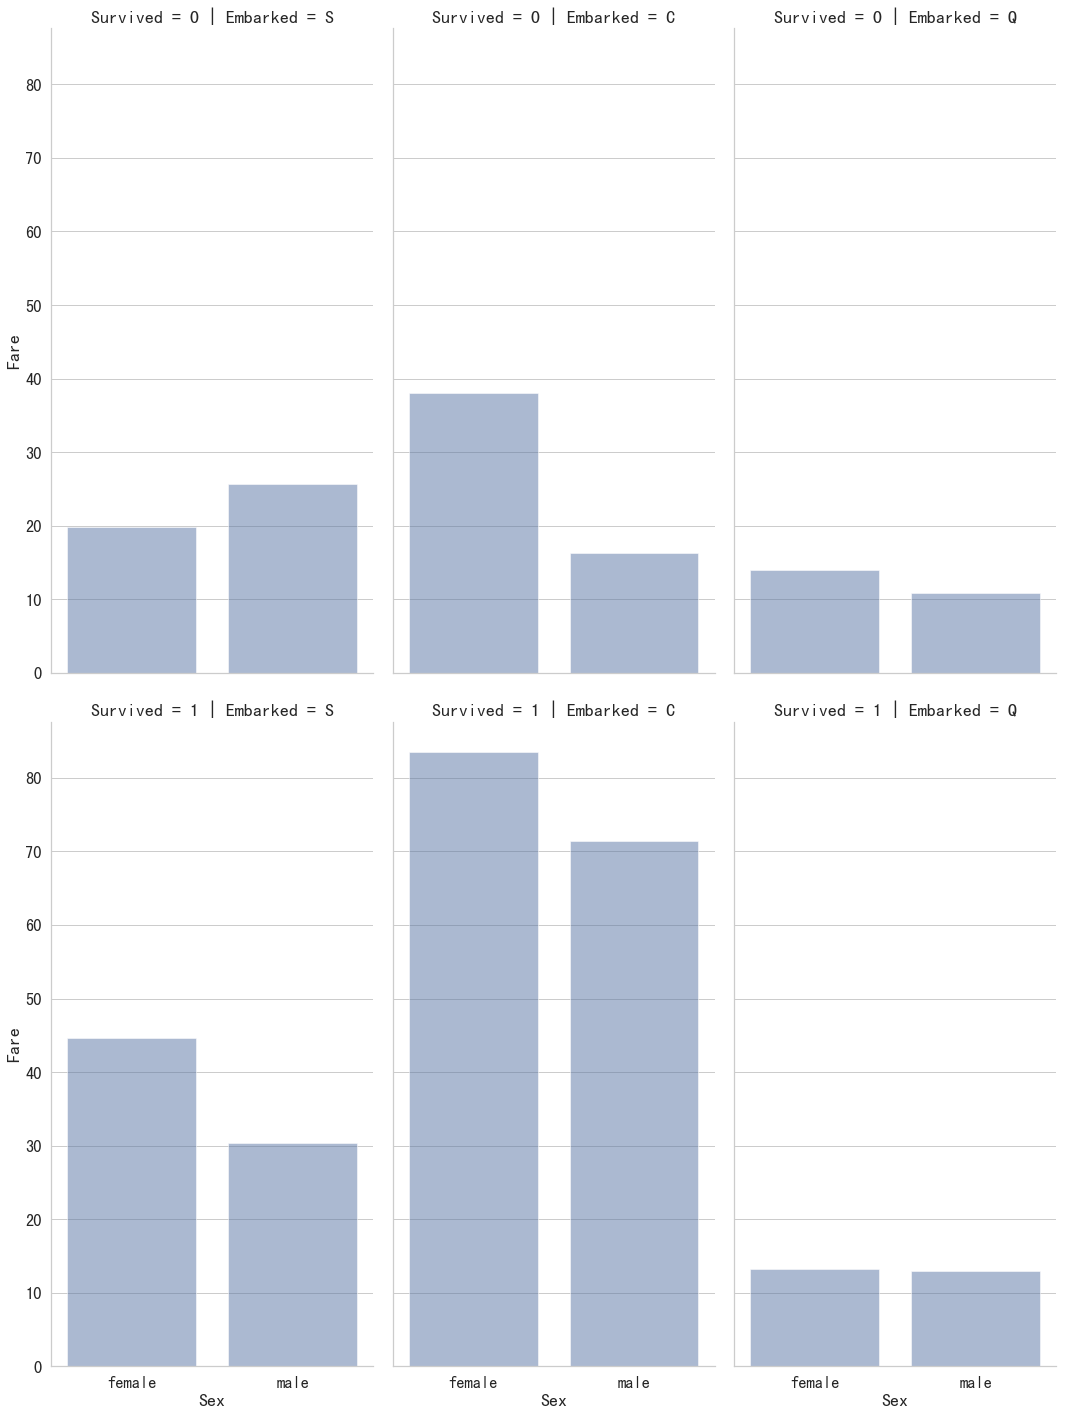

In [79]:
grid = sns.FacetGrid(train_datasets, col='Embarked', row='Survived', height=10, aspect=0.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [84]:
train_datasets.loc[train_datasets.Age.isna(), 'Name'].str.extract(' ([A-Za-z]+)\.', expand=True).value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
dtype: int64

# Wrangle data

Correcting by dropping features

In [86]:
combine = [train_datasets, test_datasets]
print("Before: ", train_datasets.shape, test_datasets.shape, combine[0].shape, combine[1].shape)

train_datasets = train_datasets.drop(columns=['Ticket', 'Cabin'])
test_datasets = test_datasets.drop(columns=['Ticket', 'Cabin'])
combine = [train_datasets, test_datasets]

combine = [train_datasets, test_datasets]
print("After: ", train_datasets.shape, test_datasets.shape, combine[0].shape, combine[1].shape)


Before:  (891, 12) (418, 11) (891, 12) (418, 11)
After:  (891, 10) (418, 9) (891, 10) (418, 9)


In [89]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' (\w+)\.', expand=True)

pd.crosstab(train_datasets['Title'], train_datasets['Pclass'])

Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,2,0,0
Countess,1,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28


In [90]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_datasets.groupby('Title', as_index=False)[['Title', 'Survived']].mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [91]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_datasets.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [92]:
test_datasets.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [93]:
train_datasets.drop(columns=['Name', 'PassengerId'], inplace=True)
test_datasets.drop(columns=['Name', 'PassengerId'], inplace=True)
combine = [train_datasets, test_datasets]
print("The shape of training datastes: {}".format(train_datasets.shape))
print("The shape of testing datastes: {}".format(test_datasets.shape))

The shape of training datastes: (891, 9)
The shape of testing datastes: (418, 8)


In [94]:
# Converting Sex feature into female = 1 and male = 0
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"female": 1, "male": 0}).astype(int)

train_datasets.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [96]:
guess_ages = np.zeros((2, 3), dtype=np.float16)
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float16)

In [97]:
for dataset in combine:
    for i in range(2):
        for j in range(3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            guess_ages[i, j] = int(guess_df.median()/0.5 + 0.5) * 0.5
    
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset['Sex']==i) & (dataset['Pclass']==j+1) & (dataset['Age'].isnull()), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int) 

train_datasets.head(5)       

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [99]:
train_datasets['AgeBand'] = pd.cut(train_datasets['Age'], 5)
train_datasets[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [100]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

train_datasets.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [102]:
train_datasets.drop(columns='AgeBand', inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [104]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_datasets[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [105]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_datasets[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [106]:
train_datasets.drop(columns=['Parch', 'SibSp', 'FamilySize'], inplace=True)
test_datasets.drop(columns=['Parch', 'SibSp', 'FamilySize'], inplace=True)

assert train_datasets.shape == combine[0].shape
assert test_datasets.shape == combine[1].shape

In [111]:
freq_port = train_datasets['Embarked'].dropna().mode()[0]
freq_port

'S'

In [112]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_datasets.groupby('Embarked', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [113]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 0, "C": 1, "Q": 2}).astype(int)

train_datasets.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [114]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']

train_datasets.loc[:, ['Age*Class', 'Age', 'Pclass']].head(5)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [120]:
test_datasets['Fare'].fillna(test_datasets['Fare'].dropna().median(), inplace=True)
test_datasets.head(5)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,7.8292,2,1,1,6
1,3,1,2,7.0000,0,3,0,6
2,2,0,3,9.6875,2,1,1,6
3,3,0,1,8.6625,0,1,1,3
4,3,1,1,12.2875,0,3,0,3


In [121]:
train_datasets['FareBand'] = pd.qcut(train_datasets['Fare'], 4)
train_datasets.groupby('FareBand', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [129]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_datasets.drop(columns='FareBand', inplace=True)
train_datasets.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [130]:
test_datasets.head(5)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


In [131]:
X_train = train_datasets.copy().drop(columns='Survived')
Y_train = train_datasets.copy()['Survived']
X_test = test_datasets.copy()

In [132]:
print(X_train.shape, Y_train.shape, X_test.shape)

(891, 8) (891,) (418, 8)


In [134]:
# fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.37

In [1]:
model = LogisticRegression()
cross_val_score(model, X_train, Y_train, cv=10)

SyntaxError: unmatched ')' (2330069247.py, line 2)

In [146]:
model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [9]:
bin(~1 & 10)

'0b1010'

In [10]:
~1 & 10

10